Importing dependancies

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

Data Exploration

In [2]:
df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [4]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [5]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
df.dropna(inplace=True)
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [7]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [8]:
df['Year'] = df['Year'].str.extract('(\d+)')  # Extract numeric part of the string
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # Convert to numeric

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\bedir\AppData\Local\Temp\ipykernel_9304\2206858452.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['Year'] = df['Year'].str.extract('(\d+)')  # Extract numeric part of the string


In [9]:
df['Duration'] = df['Duration'].str.extract('(\d+)')
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\bedir\AppData\Local\Temp\ipykernel_9304\4020654080.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['Duration'] = df['Duration'].str.extract('(\d+)')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 486.3+ KB


In [11]:
genre=df['Genre']
genre

1                            Drama
3                  Comedy, Romance
5           Comedy, Drama, Musical
6              Drama, Romance, War
8        Horror, Mystery, Thriller
                   ...            
15493                        Drama
15494    Biography, Drama, History
15503         Action, Crime, Drama
15505                Action, Drama
15508                Action, Drama
Name: Genre, Length: 5659, dtype: object

In [12]:
genres=df['Genre'].str.split(',',expand=True)
genres

,0,1,2
1,Drama,None,None
3,Comedy,Romance,None
5,Comedy,Drama,Musical
6,Drama,Romance,War
8,Horror,Mystery,Thriller
...,...,...,...
15493,Drama,None,None
15494,Biography,Drama,History
15503,Action,Crime,Drama
15505,Action,Drama,None


In [13]:
genre_counts = {}
for genre in genres.values.flatten():
    if genre is not None:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

genereCounts = {genre: count for genre, count in sorted(genre_counts.items())}
for genre, count in genereCounts.items():
    print(f"{genre}: {count}")

 Action: 34
 Adventure: 172
 Biography: 31
 Comedy: 355
 Crime: 604
 Drama: 1954
 Family: 364
 Fantasy: 115
 History: 91
 Horror: 74
 Music: 50
 Musical: 322
 Mystery: 245
 News: 1
 Romance: 1221
 Sci-Fi: 28
 Sport: 38
 Thriller: 590
 War: 30
 Western: 1
Action: 1652
Adventure: 105
Animation: 40
Biography: 84
Comedy: 989
Crime: 271
Documentary: 48
Drama: 1842
Family: 52
Fantasy: 31
History: 8
Horror: 128
Music: 3
Musical: 90
Mystery: 59
Romance: 159
Sci-Fi: 4
Sport: 2
Thriller: 89
War: 3


In [14]:
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)
df['Votes']

1           8
3          35
5         827
6        1086
8         326
         ... 
15493     408
15494    1496
15503      44
15505     655
15508      20
Name: Votes, Length: 5659, dtype: int64

In [15]:
directors = df["Director"].value_counts()
directors

Director
David Dhawan            41
Mahesh Bhatt            39
Shakti Samanta          33
Hrishikesh Mukherjee    33
Ram Gopal Varma         33
                        ..
Aziz Zee                 1
Prashant Gore            1
Harish Sharma            1
Sunil Tiwari             1
Vikram K. Kumar          1
Name: count, Length: 2431, dtype: int64

In [16]:
actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']]).dropna().value_counts()
actors

Mithun Chakraborty     160
Amitabh Bachchan       148
Dharmendra             146
Ashok Kumar            124
Akshay Kumar           120
                      ... 
Ashalata Wabgaonkar      1
Krishna Kumari           1
Usman Rao                1
Mohini Nillakant         1
Kishori Ambiye           1
Name: count, Length: 5041, dtype: int64

data Visualization

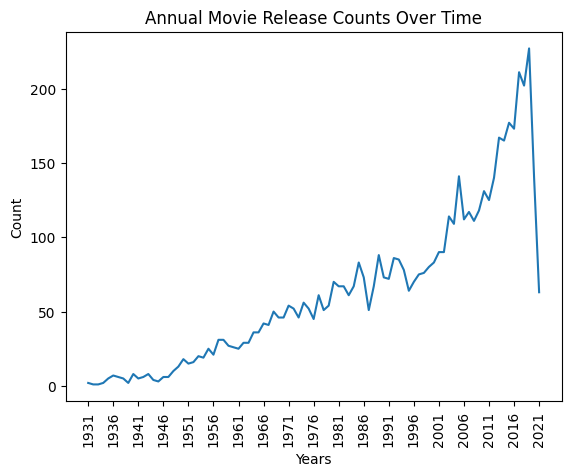

In [17]:
ax = sns.lineplot(data=df['Year'].value_counts().sort_index())
tick_positions = range(min(df['Year']), max(df['Year']) + 1, 5)
ax.set_title("Annual Movie Release Counts Over Time")
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_positions, rotation = 90)
ax.set_xlabel("Years")
ax.set_ylabel("Count")
plt.show()

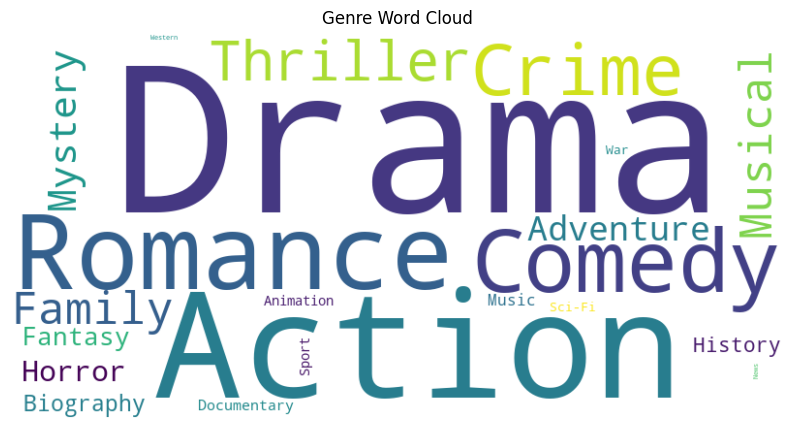

In [18]:
genre_counts = df['Genre'].str.split(', ', expand=True).stack().value_counts()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Word Cloud')
plt.show()

In [19]:
genres = df['Genre'].value_counts() 
genres = pd.DataFrame(list(genres.items()))
genres = genres.rename(columns={0: 'Genre', 1: 'Count'})
genres

,Genre,Count
0,Drama,844
1,"Drama, Romance",332
2,"Action, Crime, Drama",329
3,"Action, Drama",206
4,"Comedy, Drama",205
...,...,...
371,"Action, Comedy, War",1
372,"Mystery, Sci-Fi",1
373,"Horror, Romance, Sci-Fi",1
374,"Romance, Musical, Drama",1


In [20]:
genres.loc[genres['Count'] < 100, 'Genre'] = 'Other'
pie = px.pie(genres, values='Count', names='Genre', title='More than one Genre of movies in Indian Cinema')
pie.show()

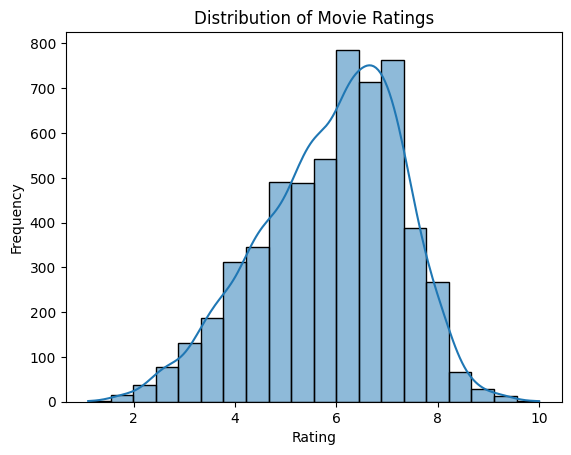

In [21]:
yb = sns.histplot(data = df, x = "Rating", bins = 20, kde = True)
yb.set_xlabel('Rating')
yb.set_ylabel('Frequency')
yb.set_title('Distribution of Movie Ratings')
plt.show()

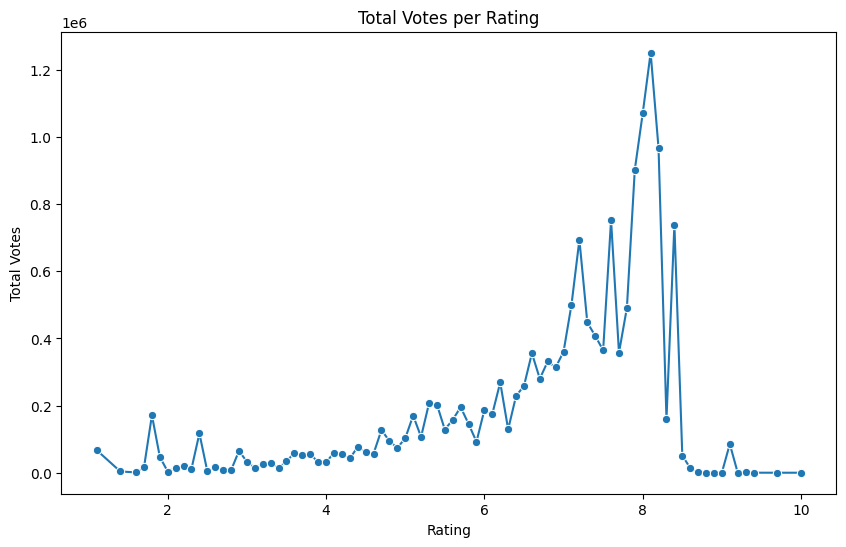

In [22]:
rating_votes = df.groupby('Rating')['Votes'].sum().reset_index()
plt.figure(figsize=(10, 6))
Line = sns.lineplot(data=rating_votes, x='Rating', y='Votes', marker='o')
Line.set_xlabel('Rating')
Line.set_ylabel('Total Votes')
Line.set_title('Total Votes per Rating')
plt.show()

C:\Users\bedir\AppData\Local\Temp\ipykernel_9304\3096862265.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\bedir\AppData\Local\Temp\ipykernel_9304\3096862265.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



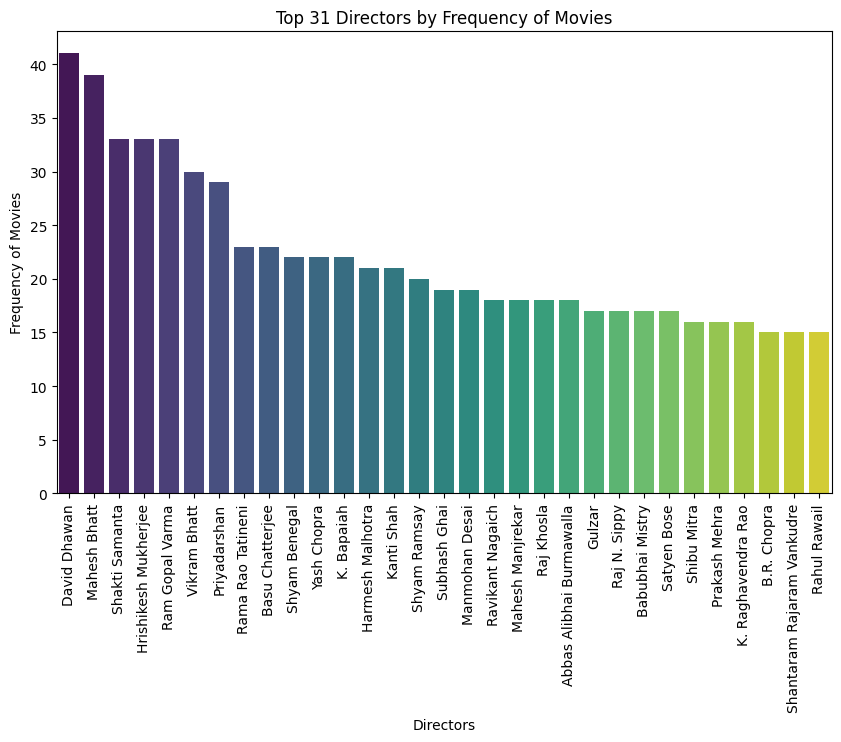

In [23]:
plt.figure(figsize=(10, 6))
di = sns.barplot(x=directors.head(31).index, y=directors.head(31).values, palette='viridis')
di.set_xlabel('Directors')
di.set_ylabel('Frequency of Movies')
di.set_title('Top 31 Directors by Frequency of Movies')
di.set_xticklabels(di.get_xticklabels(), rotation=90)
plt.show()

C:\Users\bedir\AppData\Local\Temp\ipykernel_9304\230775268.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\bedir\AppData\Local\Temp\ipykernel_9304\230775268.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



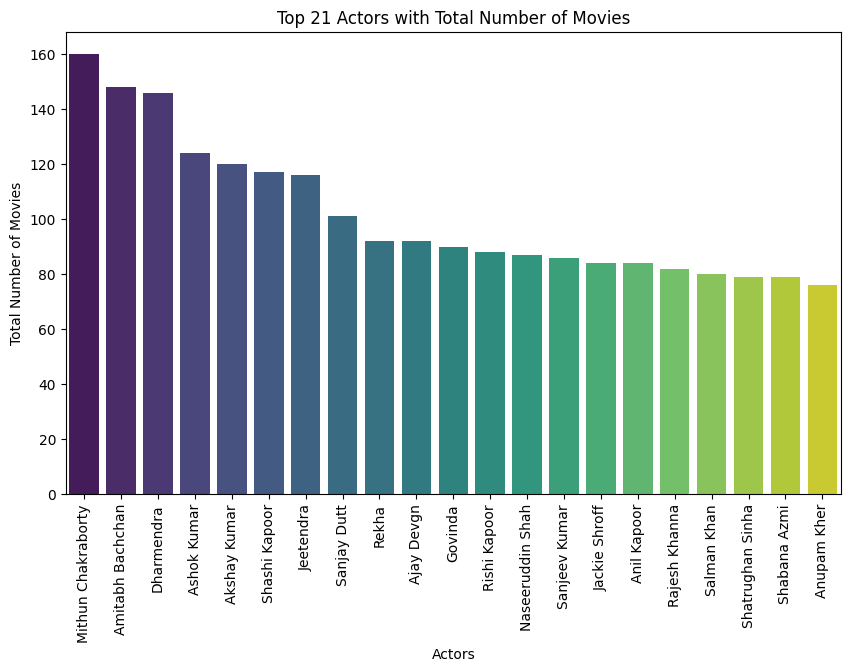

In [24]:
plt.figure(figsize=(10, 6))
ac = sns.barplot(x=actors.head(21).index, y=actors.head(21).values, palette='viridis')
ac.set_xlabel('Actors')
ac.set_ylabel('Total Number of Movies')
ac.set_title('Top 21 Actors with Total Number of Movies')
ac.set_xticklabels(ac.get_xticklabels(), rotation=90)
plt.show()

Data modeling 

In [25]:
x = df.drop(['Name', 'Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], axis=1)
y = df['Rating']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 14)

In [27]:
DT = RandomForestRegressor(random_state=14)
DT.fit(x_train, y_train)
preds = DT.predict(x_test)

In [28]:
print("r2score = {:0.2f}%".format(r2_score(y_test, preds)*100))
print("Mean Squared Error = {:0.2f}\n".format(mean_squared_error(y_test, preds, squared=False)))

r2score = 21.47%
Mean Squared Error = 1.19



c:\Users\bedir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

